# US Disaster Declarations Analysis

## by Justin Sierchio

In this analysis, we will be looking at listings of US disaster declarations. We would like to be able to answer the following questions:

<ul>
    <li>What are the most common types of disaster declarations and where do they occur?</li>
    <li>How have disaster declarations changed over time?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/headsortails/us-natural-disaster-declarations/download. More information related to the dataset can be found at: https://www.kaggle.com/headsortails/us-natural-disaster-declarations?select=us_disaster_declarations.csvus_.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for reviews
df_DISASTER = pd.read_csv("us_disaster_declarations.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Theme Park review set
df_DISASTER.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


Let's briefly list the most important column titles and their descriptions:

<ul>
    <li> fema_declaration_string: FEMA code for each disaster declaration </li>
    <li> disaster_number: number of disaster </li>
    <li> declaration type: self-explanatory </li>
    <li> declaration date: self-explanatory </li>
    <li> fy_declared: FY in which declaration was declared </li>
    <li> incident_type: type of disaster</li>
    <li> declaration_title: self-explanaotry</li>
    <li> incident_begin_date: date that incident began</li>
    <li> incident_end_date: date that incident ended</li>
    <li> disaster_closeout_date: date that disaster incident was closed</li>
    <li> designated_area: how widespread an area that the declaration applied</li>
    <li> declaration_request_number: self-explanatory</li>
</ul>

# Data Cleaning

Let's beginning by doing some basic data cleaning.

In [4]:
# Show the data types for the disaster declaration dataset
df_DISASTER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     62112 non-null  object
 1   disaster_number             62112 non-null  int64 
 2   state                       62112 non-null  object
 3   declaration_type            62112 non-null  object
 4   declaration_date            62112 non-null  object
 5   fy_declared                 62112 non-null  int64 
 6   incident_type               62112 non-null  object
 7   declaration_title           62112 non-null  object
 8   ih_program_declared         62112 non-null  int64 
 9   ia_program_declared         62112 non-null  int64 
 10  pa_program_declared         62112 non-null  int64 
 11  hm_program_declared         62112 non-null  int64 
 12  incident_begin_date         62112 non-null  object
 13  incident_end_date           53599 non-null  ob

The data looks sufficiently clean for a basic exploratory analysis.

# Exploratory Data Analysis

We see that many of the incidents are likely ongoing, since there is a disparity between the incident begin and end dates (as well as the disaster closeout dates). Let's take a look at the types of disasters that have been recorded.

In [5]:
# Show the different disaster types in the dataset
df_DISASTER_types = df_DISASTER['incident_type'].unique()
print("These are the disaster types reported:\n\n", df_DISASTER_types)
print("\n# of Occurrences:\n",df_DISASTER['incident_type'].value_counts())

These are the disaster types reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane' 'Volcano'
 'Severe Storm(s)' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snow' 'Severe Ice Storm' 'Freezing' 'Coastal Storm'
 'Fishing Losses' 'Mud/Landslide' 'Human Cause' 'Terrorist' 'Tsunami'
 'Chemical' 'Biological']

# of Occurrences:
 Severe Storm(s)     17065
Hurricane           12085
Flood               10461
Biological           7853
Snow                 3664
Fire                 3547
Severe Ice Storm     2942
Tornado              1488
Drought              1292
Coastal Storm         570
Other                 306
Freezing              301
Earthquake            227
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          36
Dam/Levee Break        13
Chemical                9
Toxic Substances        9
Tsunami                 9
Human Cause             7
Terrorist               5
Name: incident_type, dtype: int64


As we can see, severe storms, hurricanes and floods are the most likely reasons for disaster declarations. We see that there are 7 human caused disasters and 5 resulting from terrorism.

Now let's take a look at the states that are the most disaster prone.

In [6]:
# Find the states that are most disaster prone from the dataset
df_DISASTER_proneState = df_DISASTER[['state','incident_type']].groupby('state').describe()
df_DISASTER_proneState['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,5164,11,Hurricane,1303
MO,2670,8,Severe Storm(s),1309
KY,2511,10,Severe Storm(s),986
VA,2493,11,Hurricane,877
OK,2461,9,Severe Storm(s),996
LA,2301,11,Hurricane,1236
GA,2269,10,Hurricane,905
FL,2088,10,Hurricane,1012
NC,1984,10,Hurricane,1192


As we can see, Texas, Missouri and Kentucky are the most prone states to disasters. This is likely due more to geography (i.e. Texas is on the Gulf Coast and in the middle of Tornado Alley).

What are the states that are least disaster prone?

In [7]:
# Find the states that are least disaster prone from the dataset
df_DISASTER_proneState['incident_type'].sort_values(by='count',ascending=False).tail(10)

,count,unique,top,freq
state,,,,
HI,98,11,Hurricane,22
VI,79,5,Hurricane,53
AS,75,7,Hurricane,25
MP,63,3,Typhoon,53
MH,53,5,Drought,25
DE,52,7,Hurricane,21
FM,31,4,Typhoon,23
DC,23,6,Severe Storm(s),9
GU,19,5,Typhoon,13


As we can see, some of the territories (i.e. Guam, US Virgin Islands, American Samoa) fall on this list. It is not surprising that Delaware is the state with the least number of declarations given its size and location.

Going back to the state with the most disaster declarations (Texas), let's take a look at the number of declarations over time.

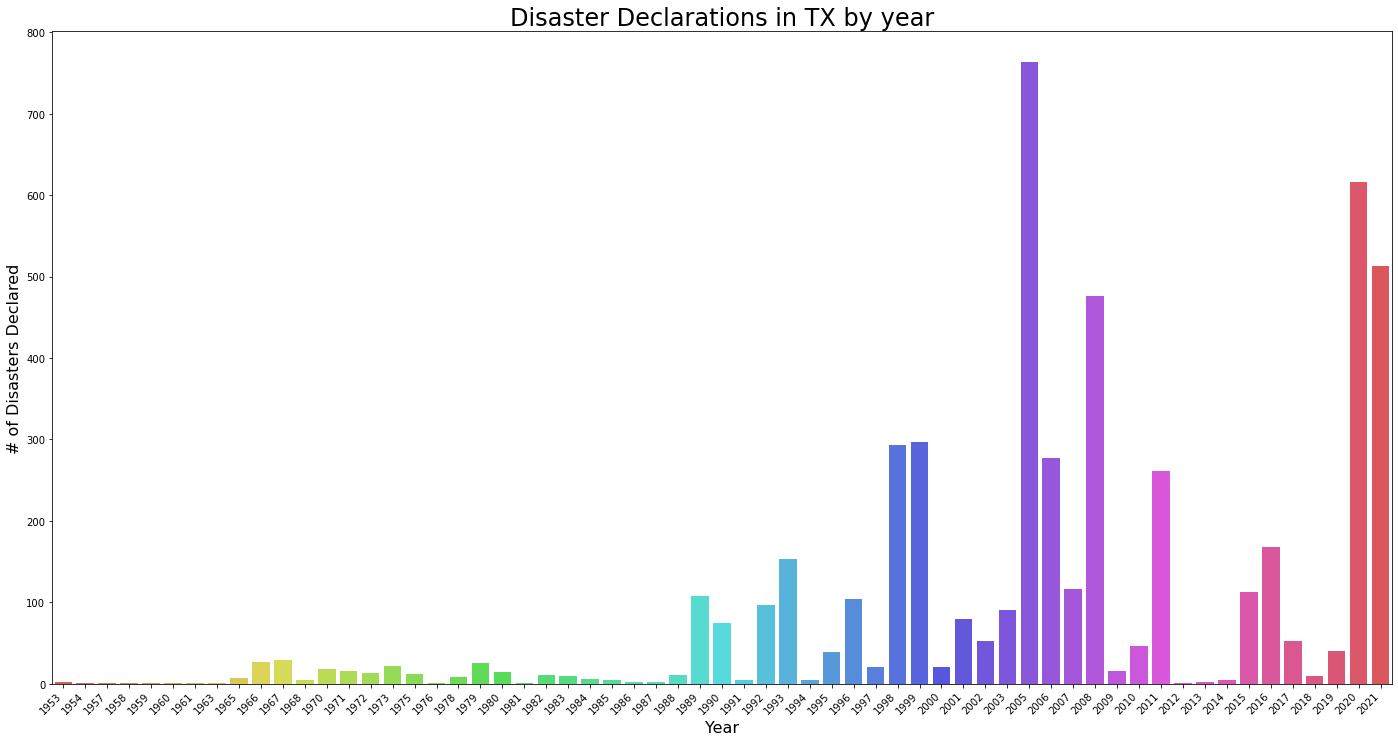

In [8]:
# Graph the number of disaster declarations in Texas over time from the dataset

# Make Query for data
df_DISASTER_TX = df_DISASTER.query('state=="TX"')['fy_declared'].value_counts().reset_index()

# Plot the data
plt.figure(figsize=(24,12))
graph = sns.barplot(x='index',y='fy_declared', data=df_DISASTER_TX.sort_values(by='fy_declared'),
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            );

# Provide title, labels and aesthetics
plt.title('Disaster Declarations in TX by year', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('# of Disasters Declared', fontsize = 16)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right');

The data shows that the number of declarations has increased over time.

In order to look at how disaster declarations might have changed over time, let's complete some queries for California.

In [22]:
# Disaster declarations in 1965, 1975, 1985, 1995, 2005 and 2015.
df_TX_1965 = df_DISASTER.query('state == "TX" & fy_declared==1965')['incident_type'].unique();
df_TX_1975 = df_DISASTER.query('state == "TX" & fy_declared==1975')['incident_type'].unique();
df_TX_1985 = df_DISASTER.query('state == "TX" & fy_declared==1985')['incident_type'].unique();
df_TX_1995 = df_DISASTER.query('state == "TX" & fy_declared==1995')['incident_type'].unique();
df_TX_2005 = df_DISASTER.query('state == "TX" & fy_declared==2005')['incident_type'].unique();
df_TX_2015 = df_DISASTER.query('state == "TX" & fy_declared==2015')['incident_type'].unique();

# Print out lists for each year
print("These are the incident types for TX disaster declarations in 1965, 1975, 1985, 1995, 2005, and 2015:\n")
print("1965: ", df_TX_1965)
print("1975: ", df_TX_1975)
print("1985: ", df_TX_1985)
print("1995: ", df_TX_1995)
print("2005: ", df_TX_2005)
print("2015: ", df_TX_2015)

These are the incident types for TX disaster declarations in 1965, 1975, 1985, 1995, 2005, and 2015:

1965:  ['Tornado']
1975:  ['Flood' 'Tornado']
1985:  ['Flood']
1995:  ['Flood' 'Severe Storm(s)']
2005:  ['Hurricane']
2015:  ['Severe Storm(s)']


As we can see, the range of incidents in Texas has shifted from tornadoes and floods to hurricanes and severe storms.

Let's look at another state: Idaho.

In [24]:
# Disaster declarations in 1965, 1975, 1985, 1995, 2005 and 2015.
df_ID_1965 = df_DISASTER.query('state == "ID" & fy_declared==1965')['incident_type'].unique();
df_ID_1975 = df_DISASTER.query('state == "ID" & fy_declared==1975')['incident_type'].unique();
df_ID_1985 = df_DISASTER.query('state == "ID" & fy_declared==1985')['incident_type'].unique();
df_ID_1995 = df_DISASTER.query('state == "ID" & fy_declared==1995')['incident_type'].unique();
df_ID_2005 = df_DISASTER.query('state == "ID" & fy_declared==2005')['incident_type'].unique();
df_ID_2015 = df_DISASTER.query('state == "ID" & fy_declared==2015')['incident_type'].unique();

# Print out lists for each year
print("These are the incident types for ID disaster declarations in 1965, 1975, 1985, 1995, 2005, and 2015:\n")
print("1965: ", df_ID_1965)
print("1975: ", df_ID_1975)
print("1985: ", df_ID_1985)
print("1995: ", df_ID_1995)
print("2005: ", df_ID_2005)
print("2015: ", df_ID_2015)

These are the incident types for ID disaster declarations in 1965, 1975, 1985, 1995, 2005, and 2015:

1965:  ['Flood']
1975:  []
1985:  []
1995:  []
2005:  ['Flood' 'Hurricane']
2015:  ['Fire']


Idaho has not had as many declarations and there is no discernable pattern.